<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/DEMO_Linear_regression_17_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Импортируем библиотеку Pandas для работы с данными в формате DataFrame
import numpy as np # Импортируем библиотеку NumPy для работы с числовыми данными

from sklearn.datasets import fetch_california_housing # Импортируем функцию fetch_california_housing из sklearn.datasets для загрузки датасета California Housing

from sklearn.model_selection import train_test_split # Импортируем функцию train_test_split из sklearn.model_selection для разделения данных на тренировочный и тестовый наборы

from sklearn.linear_model import HuberRegressor # Импортируем класс HuberRegressor из sklearn.linear_model для реализации регрессии методом Хьюбера
from sklearn.linear_model import LinearRegression # Импортируем класс LinearRegression из sklearn.linear_model для реализации линейной регрессии
from sklearn.preprocessing import PolynomialFeatures # Импортируем класс PolynomialFeatures из sklearn.preprocessing для генерации полиномиальных признаков
from sklearn.metrics import mean_squared_error # Импортируем функцию mean_squared_error из sklearn.metrics для вычисления среднеквадратичной ошибки

from sklearn.preprocessing import StandardScaler # Импортируем класс StandardScaler из sklearn.preprocessing для стандартизации данных

import matplotlib.pyplot as plt # Импортируем модуль pyplot из библиотеки matplotlib для построения графиков
import seaborn as sns # Импортируем библиотеку seaborn для улучшения визуализации данных

In [ ]:
pd.set_option('display.max_columns', 50) # Устанавливаем максимальное количество отображаемых столбцов равным 50
pd.set_option('display.max_rows', 20) # Устанавливаем максимальное количество отображаемых строк равным 20
pd.options.display.float_format = '{:.2f}'.format # Устанавливаем формат отображения чисел с двумя знаками после запятой
pd.options.mode.use_inf_as_na = True # Настройка режима Pandas для рассмотрения бесконечностей (inf) как пропущенных значений (NA)

# Конфигурация формата отображения графиков в виде векторных изображений
%config InlineBackend.figure_format = 'svg'

# для построения графиков внутри Jupyter Notebook
%matplotlib inline

**Линейная регрессия** &mdash; это модель следующего вида:
$$a(x) = \langle w, x \rangle + w_0$$
где $w \in \mathbb{R}^d$, $w_0 \in \mathbb{R}$. Обучить линейную регрессию &mdash; значит найти $w = [w_1, w_2, ... , w_n]$ и $w_0$.

# Еще раз про переобучение

В  машинном обучение есть важное свойство "способность модели к обобщению", то есть способность модели работать хорошо на новых, неизвестных тестовых данных.

Если модель научилась идеально предсказывать выборку, на которой она обучалась,то чаще всего она не выявила никакой закономерности, а следовательно она не имеет практической ценности, такую модель будем называть переобученной



MSE on test data: 13.32 and MSE on train data: 0.0


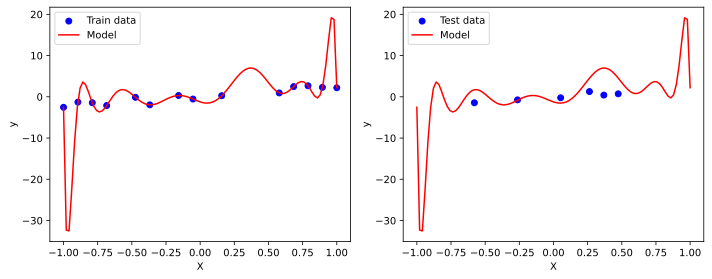

In [ ]:
# Генерация данных
X = np.linspace(-1, 1, 20)
np.random.seed(123)
y = 2*X + np.random.randn(*X.shape) * 0.5  # Добавляем  шум

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Преобразование данных с использованием полиномиальных признаков
degree = 20  # Степень полинома
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Оценка модели на тестовых данных
y_test_pred = model.predict(X_test_poly)
y_train_pred = model.predict(X_train_poly)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE on test data: {round(mse_test,2)} and MSE on train data: {round(mse_train,2)}")

# Генерация значений X для графиков
X_plot = np.linspace(-1, 1, 100)
X_plot_poly = poly_features.transform(X_plot.reshape(-1, 1))

# Печать графиков с помощью subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# График с обучающими данными и предсказаниями
ax[0].scatter(X_train, y_train, color='blue', label='Train data')
ax[0].plot(X_plot, model.predict(X_plot_poly), color='red', label='Model')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].legend()

# График с тестовыми данными и предсказаниями
ax[1].scatter(X_test, y_test, color='blue', label='Test data')
ax[1].plot(X_plot, model.predict(X_plot_poly), color='red', label='Model')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()

plt.tight_layout()
plt.show()


# Рассмотрим пример с выбросами в данных

In [ ]:
# Создание случайных данных с выбросами
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 1) * 10
y = 2 * X.squeeze() + np.random.randn(n_samples) * 2
# Добавление выбросов
X[95:] = 10
y[95:] = -50

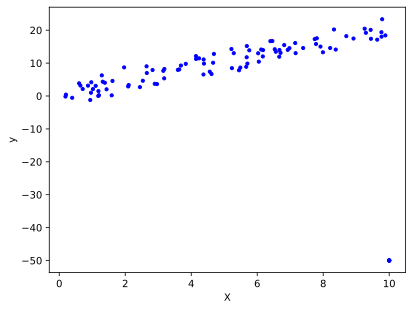

In [ ]:
# Построение графика
plt.scatter(X, y, color='blue', label='Data', s=10)

plt.xlabel('X')
plt.ylabel('y')
plt.show()

**Loss function**

$L(y, y_{pred}) = MSE = \frac{1}{N}\sum_{i=1}^N(y_i - y_i^{pred})^2, $

In [ ]:
# Линейная регрессия с MSE
reg_mse = LinearRegression()
reg_mse.fit(X, y)


LinearRegression()

**Loss function**

$L(y, y_{pred}) = \begin{cases}
\sum_{i=1}^N(\frac{1}{2}(y_i - y_i^{\text{pred}})^2, если  |y_i - y_i^{\text{pred}}| \leq \epsilon \\
\sum_{i=1}^N\epsilon|y_i - y_i^{\text{pred}}| - \frac{1}{2}\epsilon^2, если |y_i - y_i^{\text{pred}}| > \epsilon \\
\end{cases}$

In [ ]:
# Линейная регрессия с Huber функцией
reg_huber = HuberRegressor(epsilon=1.35)
reg_huber.fit(X, y)

HuberRegressor()

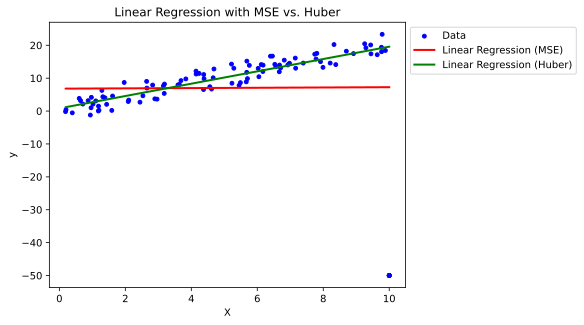

In [ ]:
# Построение графика
plt.scatter(X, y, color='blue', label='Data', s=15)
plt.plot(X, reg_mse.predict(X), color='red', linewidth=2, label='Linear Regression (MSE)')
plt.plot(X, reg_huber.predict(X), color='green', linewidth=2, label='Linear Regression (Huber)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with MSE vs. Huber')
plt.show()

# Рассмотрим пример с данными


Описание данных:

- MedInc: Медианная доходность района.
- HouseAge: Медианный возраст домов в районе.
- AveRooms: Среднее количество комнат в доме.
- AveBedrms: Среднее количество спален в доме.
- Population: Общая численность населения в районе.
- AveOccup: Среднее количество людей, проживающих в доме.
- Latitude: Широта координаты района.
- Longitude: Долгота координаты района.



Target (также называется MedHouseVal): Медианная стоимость домов в районе (целевая переменная).

In [ ]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [ ]:
target = df.MedHouseVal

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
# названия столбцов приведем к lowecase
df.columns=[col.lower() for col in df.columns]

In [ ]:
df.head()

medinc  houseage  averooms  avebedrms  population  aveoccup  latitude  \
0    8.33     41.00      6.98       1.02      322.00      2.56     37.88   
1    8.30     21.00      6.24       0.97     2401.00      2.11     37.86   
2    7.26     52.00      8.29       1.07      496.00      2.80     37.85   
3    5.64     52.00      5.82       1.07      558.00      2.55     37.85   
4    3.85     52.00      6.28       1.08      565.00      2.18     37.85   

   longitude  medhouseval  
0    -122.23         4.53  
1    -122.22         3.58  
2    -122.24         3.52  
3    -122.25         3.41  
4    -122.25         3.42

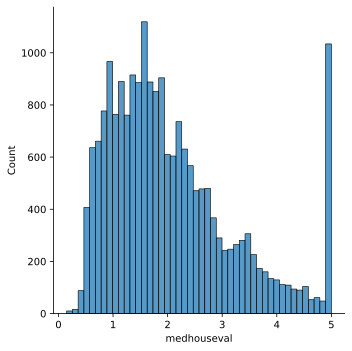

In [ ]:
sns.displot(df.medhouseval)

In [ ]:
df['cat_var'] = df['population'].map(lambda x: 1 if x>500 else 0)

In [ ]:

import seaborn as sns
sns.displot(df.medhouseval, hue = df.cat_var)

ValueError: ignored

In [ ]:
import seaborn as sns
import pandas as pd

# Предположим, у вас есть DataFrame df с колонками 'medhouseval', 'cat_var1' и 'cat_var2'

# Преобразуем данные в длинный формат с помощью функции melt()
df_long = pd.melt(df, id_vars=['medhouseval'], value_vars=['cat_var1', 'cat_var2'], var_name='category', value_name='category_value')

# Теперь используем displot с аргументом hue, указав новую колонку с категориями (category_value)
sns.displot(df_long, x='medhouseval', hue='category_value')


KeyError: ignored

Судя по гистограмме, у нас есть примеры с нетипично большой стоимостью, что может помешать нам, если наша функция потерь слишком чувствительна к выбросам.

В рамках данного исследования для упрощения удаляем выбросы с помощью метода интерквантильного размаха

In [ ]:
# посчитаем квантили распределения
df['medhouseval'].describe(percentiles=[0.1, 0.25, 0.75, 0.95 ])

count   20640.00
mean        2.07
std         1.15
min         0.15
10%         0.82
25%         1.20
50%         1.80
75%         2.65
95%         4.90
max         5.00
Name: medhouseval, dtype: float64

In [ ]:
# убираем выбросы
Q3 = np.quantile(df['medhouseval'], 0.75, axis=0)
Q1 = np.quantile(df['medhouseval'], 0.25, axis=0)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df = df[(df['medhouseval']<=upper)&(df['medhouseval']>=lower)].copy()

In [ ]:
# убираем выбросы
Q3 = np.quantile(df['medhouseval'], 0.75, axis=0)
Q1 = np.quantile(df['medhouseval'], 0.25, axis=0)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

df['medhouseval_without_outliers'] = df['medhouseval'].map(lambda x: np.NaN if x<lower else x if x<=upper else np.NaN)


# df = df[(df['medhouseval']<=upper)&(df['medhouseval']>=lower)].copy()

In [ ]:
lower, upper

(-0.7955000000000003, 4.4245)

In [ ]:
df['medhouseval'].min(), df['medhouseval'].max()

(0.14999, 4.822)

In [ ]:
df[~pd.isna(df['medhouseval_without_outliers'] )]['medhouseval_without_outliers'].min()

0.14999

In [ ]:
 df[~pd.isna(df['medhouseval_without_outliers'] )]['medhouseval'].max()

4.421

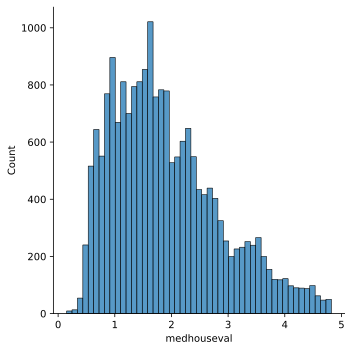

In [ ]:
# смотрим еще раз на гистаграмму
sns.displot(df.medhouseval)

Интерквантильный размах помог избавиться от выбросов

In [ ]:
# проверим пропуски
df.isna().mean().sort_values()

medinc        0.00
houseage      0.00
averooms      0.00
avebedrms     0.00
population    0.00
aveoccup      0.00
latitude      0.00
longitude     0.00
medhouseval   0.00
dtype: float64

Пропусков нет в данных

In [ ]:
# какие типы есть в датафрейме
df.dtypes.value_counts()

float64    9
dtype: int64

In [ ]:
# создадим новую переменную
df['avebedrms_averooms'] = df['avebedrms'] /df['averooms']

In [ ]:
# посчитаем статистики для переменных
df.describe(include='all')

medinc  houseage  averooms  avebedrms  population  aveoccup  latitude  \
count 19569.00  19569.00  19569.00   19569.00    19569.00  19569.00  19569.00   
mean      3.67     28.35      5.36       1.10     1442.79      3.10     35.65   
std       1.56     12.50      2.29       0.45     1145.01     10.66      2.15   
min       0.50      1.00      0.85       0.33        3.00      0.69     32.54   
25%       2.52     18.00      4.41       1.01      797.00      2.45     33.93   
50%       3.44     28.00      5.18       1.05     1181.00      2.84     34.27   
75%       4.57     37.00      5.97       1.10     1749.00      3.31     37.73   
max      15.00     52.00    132.53      34.07    35682.00   1243.33     41.95   

       longitude  medhouseval  avebedrms_averooms  
count   19569.00     19569.00            19569.00  
mean     -119.56         1.91                0.22  
std         2.01         0.95                0.06  
min      -124.35         0.15                0.10  
25%      -121.76         1.16                0.18  
50%      -118.51         1.73                0.20  
75%      -117.99         2.47                0.24  
max      -114.31         4.82                1.00

В данных не обнаружены пропуски и выбросы

**Разделим данные на обучающую и тестовую выборки**

**Вопрос**: Почему стоит дополнительно отделять тестовую выборку?

**Вопрос**: Обратите внимание на фиксацию `random_state` при сплите данных. Почему это важно?

In [ ]:
y = df['medhouseval']
X = df.drop(columns= 'medhouseval')

In [ ]:
# Разделение данных на тренировочный и тестовый наборы с помощью функции train_test_split из sklearn.model_selection
# X - матрица признаков
# y - вектор целевой переменной
# test_size=0.3 - указываем, что 30% данных будут отведены для тестового набора, а 70% - для тренировочного набора
# random_state=10 - устанавливаем случайное начальное состояние для повторяемости результатов

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Так как для решения нашей задачи мы бы хотели обучить линейную регрессию, было бы хорошо найти признаки, "наиболее линейно" связанные с целевой переменной, иначе говоря, посмотреть на коэффициент корреляции Пирсона между признаками и целевой переменной. Корреляция Пирсона записывается следующим образом:

$$
\text{corr}(X, Y)=\frac{\operatorname{cov}_{X Y}}{\sigma_X \sigma_Y}=\frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n(X_i - \bar{X})^2 \sum_{i=1}^n(Y_i - \bar{Y})^2}}
$$

**Вопрос**: Что означает, что коэффициент корреляции Пирсона между двумя случайными величинами равен 1? -1? 0?

Заметим, что не все признаки являются числовыми, пока что мы не будем рассматривать такие признаки.

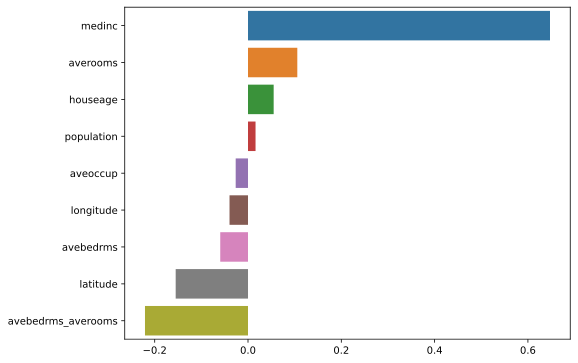

In [ ]:
correlations = X_train.corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(8, 6)

Посмотрим на признаки из начала списка. Для этого нарисуем график зависимости целевой переменной от каждого из признаков. На этом графике каждая точка соответствует паре признак-таргет (такие графики называются scatter-plot).

In [ ]:
cutof_corr = 0.1
features_high_corr_with_target = correlations[correlations>cutof_corr].index


fig, axs = plt.subplots(figsize=(len(features_high_corr_with_target)*4, 4), ncols=len(features_high_corr_with_target))
for i, feature in enumerate(features_high_corr_with_target):
  axs[i].scatter(X_train[feature], y_train, alpha=0.2)
  axs[i].set_xlabel(feature)
  axs[i].set_ylabel("target")
plt.tight_layout()

Видим, что между этими признаками и целевой переменной  наблюдается линейная зависимость.

Обучить линейную регрессию на признаках из нашего датасета.

В `StatsModel` есть несколько классов, реализующих линейную регрессию: https://www.statsmodels.org/stable/index.html  &mdash;

У моделей из `StatsModel` есть методы `fit` и `predict`.

Метод `fit` принимает на вход обучающую выборку и вектор целевых переменных и обучает модель

метод `predict` может быть вызван только после обучения модели, то есть только после метода `fit`, метод `predict` возвращает предсказание на выборке.


## StatsModel

In [ ]:
X_train_st = X_train.copy()
X_test_st = X_test.copy()

In [ ]:
import statsmodels.api as sm

# Добавление константы к матрице признаков
X_train_st = sm.add_constant(X_train)
X_test_st = sm.add_constant(X_test)

# Создание и обучение модели линейной регрессии
model = sm.OLS(y_train, X_train_st)
results = model.fit()

# Вывод результатов регрессии
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medhouseval   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2146.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:31:33   Log-Likelihood:                -12808.
No. Observations:               13698   AIC:                         2.564e+04
Df Residuals:                   13688   BIC:                         2.571e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -34.4290      0.695    -49.572      0.000     -35.790     -33.068
medinc                 0.4235      0.005     78.312      0.000       0.413       0.434
houseage               0.0079      0.000     16.547      0.000       0.007       0.009
averooms               0.0584      0.010      5.658      0.000       0.038       0.079
avebedrms             -0.1556      0.046     -3.397      0.001      -0.245      -0.066
population          4.691e-06   4.94e-06      0.950      0.342   -4.98e-06    1.44e-05
aveoccup              -0.0034      0.001     -4.574      0.000      -0.005      -0.002
latitude              -0.3722      0.008    -48.993      0.000      -0.387      -0.357
longitude             -0.3920      0.008    -49.317      0.000      -0.408      -0.376
avebedrms_averooms     3.8434      0.196     19.645      0.000       3.460       4.227
==============================================================================
Omnibus:                     2216.119   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6278.829
Skew:                           0.866   Prob(JB):                         0.00
Kurtosis:                       5.828   Cond. No.                     2.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_train_pred = results.predict(X_train_st)
y_test_pred = results.predict(X_test_st)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.6134
Train RMSE = 0.6164


p-values (p-значения): Показывают статистическую значимость каждого коэффициента. Малые значения p-значений (обычно меньше 0,05) указывают на статистическую значимость коэффициентов.

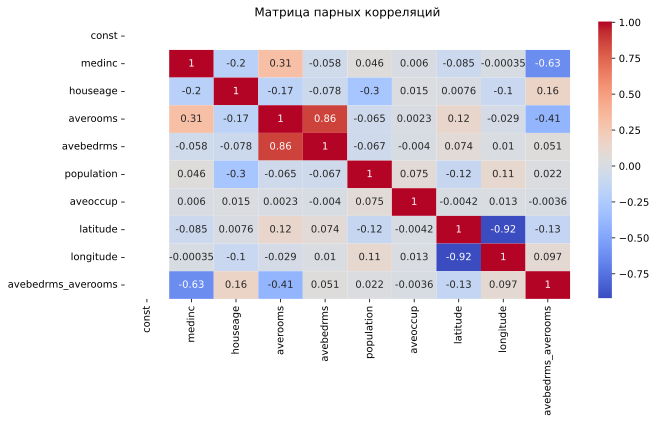

In [ ]:
# Расчет матрицы парных корреляций

correlation_matrix = X_train_st.corr()

# Визуализация матрицы парных корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

In [ ]:
import statsmodels.api as sm

# Добавление константы к матрице признаков
X_train_st = X_train_st.drop(columns=['population', 'avebedrms', 'longitude'])
X_test_st = X_test_st.drop(columns=['population', 'avebedrms', 'longitude'])

# Создание и обучение модели линейной регрессии
model = sm.OLS(y_train, X_train_st)
results = model.fit()

# Вывод результатов регрессии
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medhouseval   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     2382.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:31:35   Log-Likelihood:                -13940.
No. Observations:               13698   AIC:                         2.789e+04
Df Residuals:                   13691   BIC:                         2.795e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6162      0.117     -5.264      0.000      -0.846      -0.387
medinc                 0.5254      0.005    107.877      0.000       0.516       0.535
houseage               0.0141      0.000     29.835      0.000       0.013       0.015
averooms              -0.0051      0.003     -1.929      0.054      -0.010    8.12e-05
aveoccup              -0.0046      0.001     -5.608      0.000      -0.006      -0.003
latitude              -0.0209      0.003     -7.614      0.000      -0.026      -0.016
avebedrms_averooms     4.5775      0.136     33.741      0.000       4.312       4.843
==============================================================================
Omnibus:                     2031.629   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6398.738
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       5.976   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_train_pred = results.predict(X_train_st)
y_test_pred = results.predict(X_test_st)

In [ ]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.6631
Train RMSE = 0.6695


### Проверим остатки

In [ ]:
residual_train = y_train_pred - y_train
residual_test = y_test_pred - y_test

In [ ]:
np.std(residual_train), np.mean(residual_train)

(0.6694788878619456, -1.0849030017829241e-14)

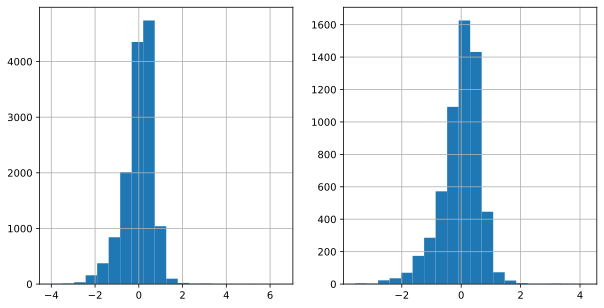

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
residual_train.hist(bins=20)
plt.subplot(1, 2, 2)
residual_test.hist(bins=20)
plt.show()

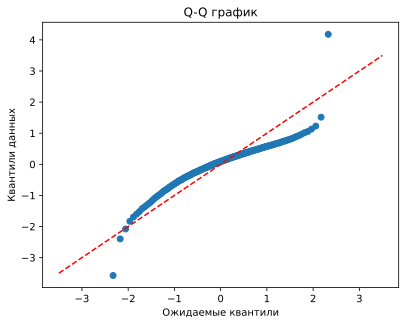

In [ ]:
import scipy.stats as stats

# Вычислим квантили для данных и ожидаемые квантили нормального распределения
quantiles = np.percentile(residual_test, np.linspace(0, 100, num=200))
expected_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, num=200))

# Построим график Q-Q
plt.scatter(expected_quantiles, quantiles)
plt.plot([-3.5, 3.5], [-3.5, 3.5], color='red', linestyle='--')
plt.xlabel('Ожидаемые квантили')
plt.ylabel('Квантили данных')
plt.title('Q-Q график')
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis
# Рассчитаем коэффициент асимметрии и эксцесс
skewness = skew(residual_test)
kurt = kurtosis(residual_test)

print("Коэффициент асимметрии:", skewness)
print("Коэффициент эксцесса:", kurt)

Коэффициент асимметрии: -0.8021412757184669
Коэффициент эксцесса: 2.4113190099708506


In [ ]:
# Построение графика ошибок
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(residual_train.index, residual_train, 'o')
plt.xlabel('index')
plt.ylabel('Ошибки')
plt.subplot(1, 2, 2)
plt.plot(residual_test.index, residual_test, 'o')
plt.xlabel('index')
plt.ylabel('Ошибки')

plt.title('График ошибок')
plt.show()

Будем считать, что остатки гомоскедастичны

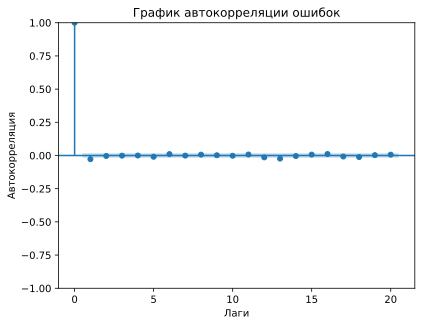

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# Построение графика автокорреляции
plot_acf(residual_train[:], lags=20)
plt.xlabel('Лаги')
plt.ylabel('Автокорреляция')
plt.title('График автокорреляции ошибок')
plt.show()


Автокорреляции в остатках тоже нет

## Sklearn

Обучить линейную регрессию на признаках из нашего датасета.

В `sklearn` есть несколько классов, реализующих линейную регрессию:
* [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) &mdash; "классическая" линейная регрессия с оптимизацией MSE. Веса находятся как точное решение: $w^* = (X^TX)^{-1}X^Ty$

У моделей из `sklearn` есть методы `fit` и `predict`.

Метод `fit` принимает на вход обучающую выборку и вектор целевых переменных и обучает модель

метод `predict` может быть вызван только после обучения модели, то есть только после метода `fit`, метод `predict` возвращает предсказание на выборке.

Обучить нашу первую модель на числовых признаках

In [ ]:
X_train

medinc  houseage  averooms  avebedrms  population  aveoccup  latitude  \
1185     2.05     21.00      5.62       1.06     1364.00      2.91     39.48   
7605     2.96     37.00      5.32       1.09      699.00      3.57     33.89   
5999     3.64     33.00      5.73       1.06     1797.00      3.65     34.08   
12830    2.50     28.00      6.26       1.11      542.00      3.66     38.69   
4695     3.20     44.00      4.37       1.07     1045.00      1.69     34.07   
...       ...       ...       ...        ...         ...       ...       ...   
9910     2.73     25.00      4.94       1.01     2756.00      2.76     38.31   
7624     5.54     24.00      6.84       1.01     4558.00      3.43     33.85   
18781    1.84     17.00      5.32       1.05      887.00      2.81     40.39   
7626     3.75     29.00      5.45       1.03     2115.00      4.45     33.86   
18726    1.60     19.00      5.70       1.11      505.00      2.76     40.58   

       longitude  avebedrms_averooms  
1185     -121.52                0.19  
7605     -118.25                0.20  
5999     -117.75                0.19  
12830    -121.43                0.18  
4695     -118.37                0.25  
...          ...                 ...  
9910     -122.29                0.20  
7624     -118.26                0.15  
18781    -122.29                0.20  
7626     -118.27                0.19  
18726    -122.30                0.20  

[13698 rows x 9 columns]

In [ ]:
X_train = X_train.drop(columns=['avebedrms', 'longitude'])
X_test = X_test.drop(columns=['avebedrms', 'longitude'])

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.6626
Train RMSE = 0.6691


Давайте посмотрим на то, какие же признаки оказались самыми "сильными". Для этого визуализируем веса, соответствующие признакам. Чем больше вес &mdash; тем более сильным является признак.

**Вопрос**: Почему это не совсем правда?

In [ ]:
def show_weights(features, weights, means, scales):
    fig, axs = plt.subplots(figsize=(12, 6), ncols=3)
    sorted_weights = sorted(zip(weights, features, means, scales), reverse=True)
    weights, features, means, scales = zip(*sorted_weights)
    features = list(features)

    sns.barplot(y=features, x=list(weights), ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=list(means), ax=axs[1])
    axs[1].set_xlabel("Mean")
    sns.barplot(y=features, x=list(scales), ax=axs[2])
    axs[2].set_xlabel("Scale")
    plt.tight_layout()

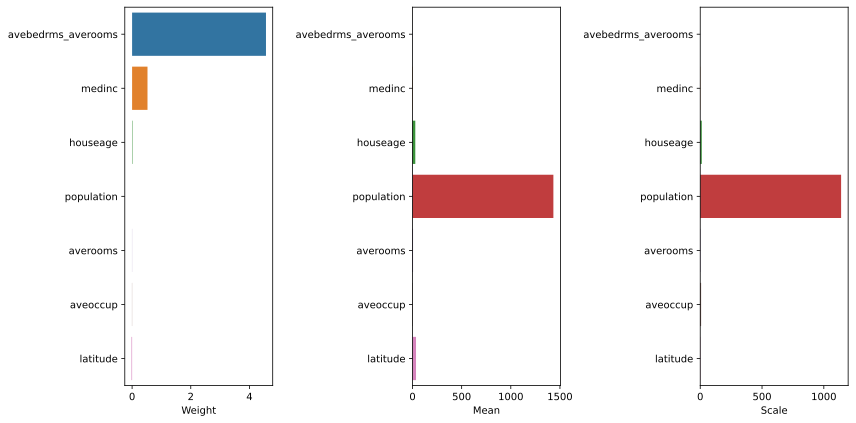

In [ ]:
show_weights(X_train.columns, model.coef_, X_train.mean(), X_train.std())

Будем масштабировать наши признаки перед обучением модели. Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени.

Для этого воспользуемся трансформером [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Трансформеры в `sklearn` имеют методы `fit` и `transform` (а еще `fit_transform`). Метод `fit` принимает на вход обучающую выборку и считает по ней необходимые значения (например статистики, как `StandardScaler`: среднее и стандартное отклонение каждого из признаков). `transform` применяет преобразование к переданной выборке.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.6626
Train RMSE = 0.6691


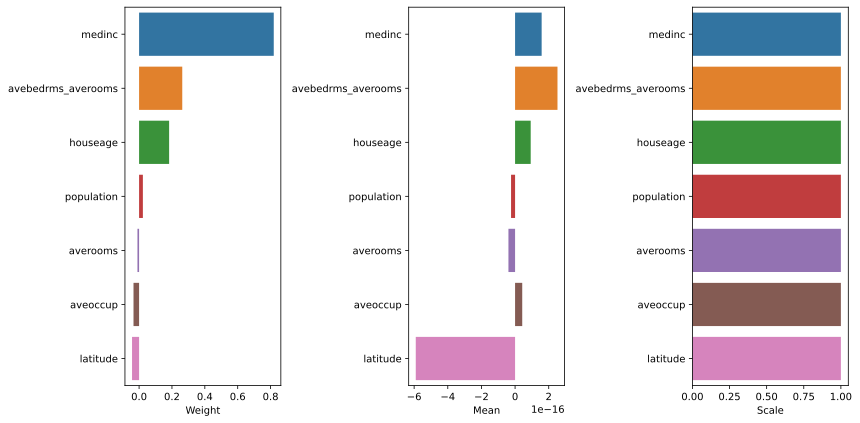

In [ ]:
means = pd.Series(data=X_train_scaled.mean(axis=0), index=X_train.columns)
scales = pd.Series(data=X_train_scaled.std(axis=0), index=X_train.columns)
show_weights(X_train.columns, model.coef_, means, scales)